In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [11]:
dataset = pd.read_csv('datasets/wines.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1/5, random_state=0
)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# in order to visualise our classifier we want to extract the variables that
# explain the most variance. The PCA class will tell us how many variables
# explain which variance.
pca = PCA(n_components=None)
pca.fit_transform(X_train)
pca.transform(X_test)

# The first two variables explain 0.36 + 0.19 = 0.55 percent of the variance.
pca.explained_variance_ratio_

array([ 0.36884109,  0.19318394,  0.10752862,  0.07421996,  0.06245904,
        0.04909   ,  0.04117287,  0.02495984,  0.02308855,  0.01864124,
        0.01731766,  0.01252785,  0.00696933])

In [15]:
# therefore we use PCA with 2 components
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [16]:
classifier = LogisticRegression(random_state=0)
classifier = classifier.fit(X_train, y_train)

In [17]:
# great results as seen by the confusion matrix
confusion_matrix(y_test, classifier.predict(X_test))

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]])

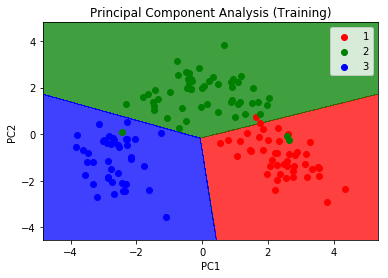

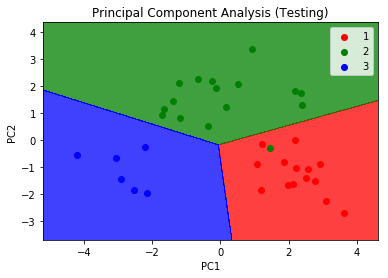

In [18]:
# now we create a plotting function and plot our train and test sets
def plot_classifier(X_set, y_set, set_description='Training'):
    """
    We visualise the decision boundary. First create a new meshgrid from
    our test set and fill it with datapoints for every value of 0.01
    in between our min and max of the first and second column.
    Subtracting and adding 1 to each, so our datapoints don't 
    get squashed up to the sides of the graph.
    """
    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
        np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
    )
    # we then go over each data point in our new mesh and predict if the value is 0 or 1 and apply
    # a color to it.
    plot.contourf(
        X1, X2, 
        classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
        alpha=0.75,
        cmap=ListedColormap(('red', 'green', 'blue'))
     )
    # we set the limits of the graph to the limits of our mesh grid.
    plot.xlim(X1.min(), X1.max())
    plot.ylim(X2.min(), X2.max())

    # and add our training set data points.
    for i, j in enumerate(np.unique(y_set)):
        plot.scatter(
            X_set[y_set == j, 0],
            X_set[y_set == j, 1],
            c=ListedColormap(('red', 'green', 'blue'))(i),
            label=j
        )

    plot.title(f'Principal Component Analysis ({set_description})')
    plot.xlabel('PC1')
    plot.ylabel('PC2')
    plot.legend()
    plot.show()

plot_classifier(X_train, y_train)
plot_classifier(X_test, y_test, 'Testing')